In [8]:
import pandas as pd

In [12]:
import json

with open('/Documents/LevelData/district_2.json') as json_data:
    data = json.load(json_data)
    # ld_benchmarks = pd.DataFrame(data['benchmarks'])
    if 'benchmarks' in data:
        ld_benchmarks = pd.DataFrame(data['benchmarks'])
    else:
        print("Key 'benchmarks' not found in the JSON.")

In [ ]:
ld_benchmarks.head()

,id,districtId,year,level,dataSource,value
0,120,45,2017,3,value_scantronMath,2356
1,121,45,2017,3,value_scantronReading,2563
2,122,45,2017,4,value_scantronMath,2493
3,123,45,2017,4,value_scantronReading,2674
4,124,45,2017,5,value_scantronMath,2584


In [14]:
with open('/Documents/LevelData/district_2.json') as json_data:
    data = json.load(json_data)
    ld_schools = pd.DataFrame(data['schools'])

In [15]:
with open('/Documents/LevelData/district_2.json') as json_data:
    data = json.load(json_data)
    ld_cs = pd.DataFrame(data['courseSections'])

In [16]:
with open('/Documents/LevelData/district_2.json') as json_data:
    data = json.load(json_data)
    ld_csr = pd.DataFrame(data['courseSectionRosters'])

In [17]:
with open('/Documents/LevelData/district_2.json') as json_data:
    data = json.load(json_data)
    ld_scores = pd.DataFrame(data['scores'])

In [18]:
ld_schools.head()

,id,name,districtId,costCenter,abbreviation,acqRequestSelectable,oneRoster_sourcedId,oneRoster_ticketId
0,222,Elementary A,45,5,EES,1,,0
1,223,Middle School A,45,8,EMS,1,,0
2,224,High School A,45,10,ECHS,1,,0
3,225,Junior High B,45,12,ECJH,1,,0
4,226,Elementary School B,45,18,HES,1,,0


In [19]:
ld_cs.head()

,id,vanityId,year,schoolId
0,40388,PE 4,2015,222
1,40389,READING 4,2015,222
2,40390,HmroomPK6,2015,222
3,40391,LANGUAGE 4,2015,222
4,40392,SCIENCE 4,2015,222


In [ ]:
ld_csr.head()

,id,courseSectionId,studentId,studentLevel,ticket
0,1047696,39975,45333,4,
1,1047704,39975,56116,4,
2,1047706,39975,45345,4,
3,1047715,39975,45400,4,
4,1047729,39975,45413,4,


In [ ]:
ld_scores.head()

,id,ticket,studentId,studentLevel,year,measurementTypeId,subgroup_specialEd,subgroup_lunchStatus,subgroup_gender,subgroup_ethnicity,...,value_starReading,value_starMath,value_ScienceMilestones,value_LEAPScience,value_SocialMilestones,value_gcaInfo,value_gcaNar,value_gcaOpin,value_aimsWebMath,value_aimsWebReading
0,115316,1530793427me3n202dz2,44774,8,2017,4,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,120482,1530793766nnbvcr456s,44774,8,2017,6,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,394052,1561150944dlvii7ak6r,44774,9,2018,6,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,115317,1530793427me3n202dz2,44775,8,2017,4,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,120483,1530793766nnbvcr456s,44775,8,2017,6,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


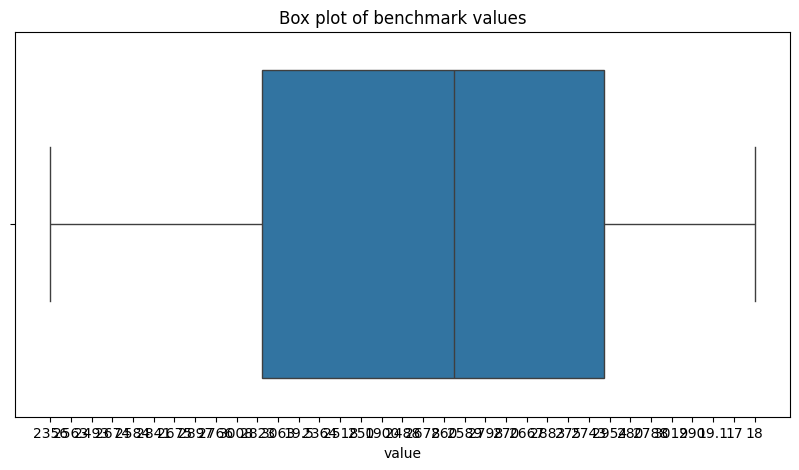

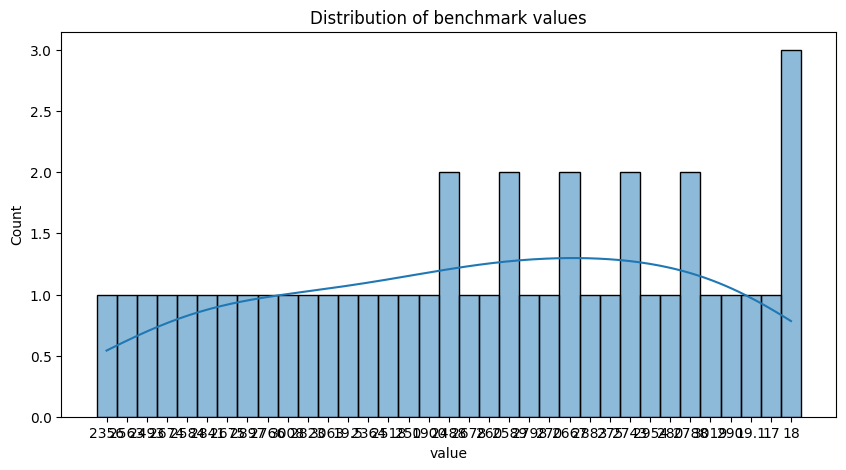

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# box plot
plt.figure(figsize=(10, 5))
sns.boxplot(x=ld_benchmarks['value'])
plt.title('Box plot of benchmark values')
plt.show()

# histogram
plt.figure(figsize=(10, 5))
sns.histplot(ld_benchmarks['value'], bins=30, kde=True)
plt.title('Distribution of benchmark values')
plt.show()

In [21]:

print(ld_benchmarks.isnull().sum())


id            0
districtId    0
year          0
level         0
dataSource    0
value         0
dtype: int64


In [26]:

import pandas as pd
from scipy import stats
import numpy as np

# ensure all values in the 'value' column are numeric, converting any non-numeric values to NaN
ld_benchmarks['value'] = pd.to_numeric(ld_benchmarks['value'], errors='coerce')

# fill NaNs with 0 or drop NaNs based on your choice
ld_benchmarks['value'] = ld_benchmarks['value'].fillna(0)

# calculate z-scores
ld_benchmarks['z_score'] = np.abs(stats.zscore(ld_benchmarks['value']))

# filter out outliers based on z-score threshold
outliers_zscore = ld_benchmarks[ld_benchmarks['z_score'] > 3]

# print outliers
print(outliers_zscore)


Empty DataFrame
Columns: [id, districtId, year, level, dataSource, value, z_score]
Index: []


In [54]:
from scipy import stats
import numpy as np

# calculate z-scores
ld_benchmarks['z_score'] = np.abs(stats.zscore(ld_benchmarks['value']))

# filter out outliers based on Z-score
outliers_zscore = ld_benchmarks[ld_benchmarks['z_score'] > 3]
print(outliers_zscore)
print(outliers_zscore[['value', 'z_score']])


import pandas as pd
from scipy import stats
import numpy as np

# convert the 'value_actEnglishScore' column to numeric, setting errors='coerce' to handle non-numeric values
ld_benchmarks['value'] = pd.to_numeric(ld_benchmarks['value'], errors='coerce')

# fill NaNs with 0 or any other appropriate method
ld_benchmarks['value'] = ld_benchmarks['value'].fillna(0)

# calculate z-scores
ld_benchmarks['z_score'] = np.abs(stats.zscore(ld_benchmarks['value']))

# filter out outliers based on z-scores
outliers_zscore = ld_benchmarks[ld_benchmarks['z_score'] > 3]

# print the outliers
print(outliers_zscore[['value', 'z_score']])

Empty DataFrame
Columns: [id, districtId, year, level, dataSource, value, z_score]
Index: []
Empty DataFrame
Columns: [value, z_score]
Index: []
Empty DataFrame
Columns: [value, z_score]
Index: []


In [36]:
import pandas as pd
from scipy import stats
import numpy as np

# convert the 'value_actEnglishScore' column to numeric, setting errors='coerce' to handle non-numeric values
ld_scores['value_actEnglishScore'] = pd.to_numeric(ld_scores['value_actEnglishScore'], errors='coerce')

# fill NaNs with 0 or any other appropriate method
ld_scores['value_actEnglishScore'] = ld_scores['value_actEnglishScore'].fillna(0)

# calculate z-scores
ld_scores['z_score'] = np.abs(stats.zscore(ld_scores['value_actEnglishScore']))

# filter out outliers based on z-scores
outliers_zscore = ld_scores[ld_scores['z_score'] > 3]

# print the outliers
print(outliers_zscore[['value_actEnglishScore', 'z_score']])


       value_actEnglishScore   z_score
1791                    15.0  3.147846
2440                    25.0  5.408424
2967                    15.0  3.147846
4265                    24.0  5.182366
4807                    21.0  4.504193
...                      ...       ...
34118                   16.0  3.373904
34130                   21.0  4.504193
34131                   19.0  4.052077
34133                   15.0  3.147846
34137                   16.0  3.373904

[1407 rows x 2 columns]


In [63]:
# basic statistics of the outliers
outliers_zscore = ld_scores[ld_scores['z_score'] > 3]
print("Outliers - Basic Statistics:")
print(outliers_zscore['value_actEnglishScore'].describe())

# compared with non-outliers
non_outliers = ld_scores[ld_scores['z_score'] <= 3]
print("\nNon-Outliers - Basic Statistics:")
print(non_outliers['value_actEnglishScore'].describe())

Outliers - Basic Statistics:
count    1407.000000
mean       20.377399
std         4.621260
min        15.000000
25%        16.000000
50%        20.000000
75%        23.000000
max        36.000000
Name: value_actEnglishScore, dtype: float64

Non-Outliers - Basic Statistics:
count    32910.000000
mean         0.249802
std          1.697946
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         14.000000
Name: value_actEnglishScore, dtype: float64


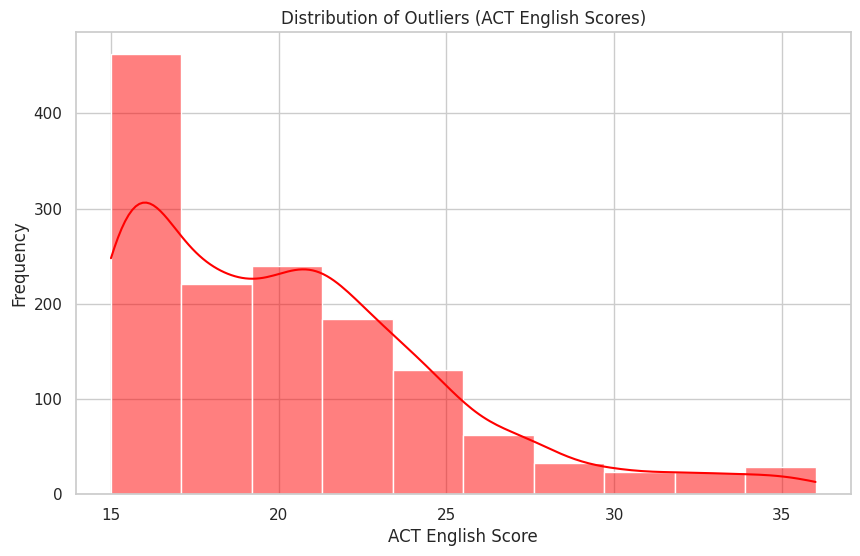

In [65]:
import matplotlib.pyplot as plt
import seaborn as sns

# distribution of outliers
plt.figure(figsize=(10, 6))
sns.histplot(outliers_zscore['value_actEnglishScore'], bins=10, kde=True, color='red')
plt.title('Distribution of Outliers (ACT English Scores)')
plt.xlabel('ACT English Score')
plt.ylabel('Frequency')
plt.show()

In [68]:
# Mean before and after removing outliers
mean_with_outliers = ld_scores['value_actEnglishScore'].mean()
mean_without_outliers = non_outliers['value_actEnglishScore'].mean()

print(f"Mean with outliers: {mean_with_outliers}")
print(f"Mean without outliers: {mean_without_outliers}")


Mean with outliers: 1.075035696593525
Mean without outliers: 0.24980249164387724
